# 准备环境

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import pandas as pd
import json
from itertools import islice
from pprint import pprint

# 设置matplotlib中文字体
plt.rcParams["font.family"] = ["SimHei"]

from deepface import DeepFace

项目网址：https://github.com/serengil/deepface

# 显示图片

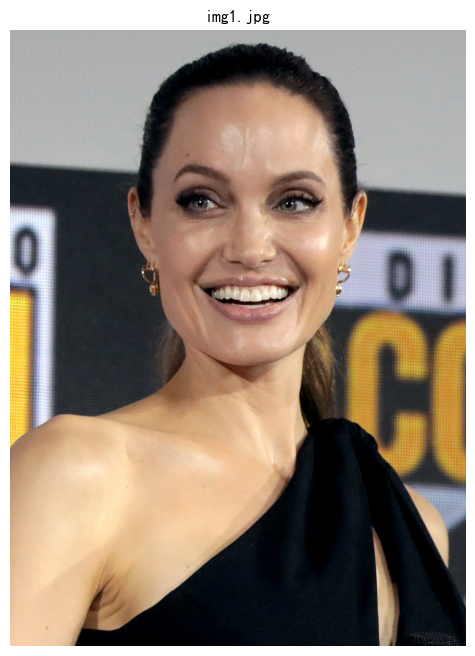

In [ ]:
image_path="tests\dataset\img1.jpg"  # Replace with your image path
img = cv2.imread(image_path)
# 检查图片是否成功加载
if img is None:
    raise Exception(f"无法打开图片或图片格式不支持: {image_path}")

# 转换颜色空间（OpenCV默认使用BGR，而matplotlib使用RGB）
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 使用matplotlib显示图片
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.axis('off')  # 不显示坐标轴
plt.title(os.path.basename(image_path))
plt.show()

In [8]:
target_size = (224, 224)  # DeepFace expects images of size 224x224x3

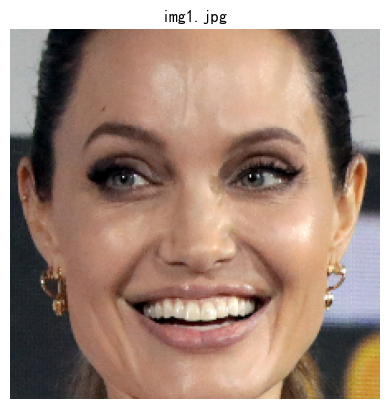

In [14]:
img_path="tests/dataset/img1.jpg"
img1 = DeepFace.extract_faces(img_path)[0]["face"]
img1 = cv2.resize(img1, target_size)

# plt.figure(figsize=(8, 8))
plt.imshow(img1)
plt.axis('off')  # 不显示坐标轴
plt.title(os.path.basename(img_path))
plt.show()

# Face Verification

人脸验证：验证两张人脸图像是否为同一人。

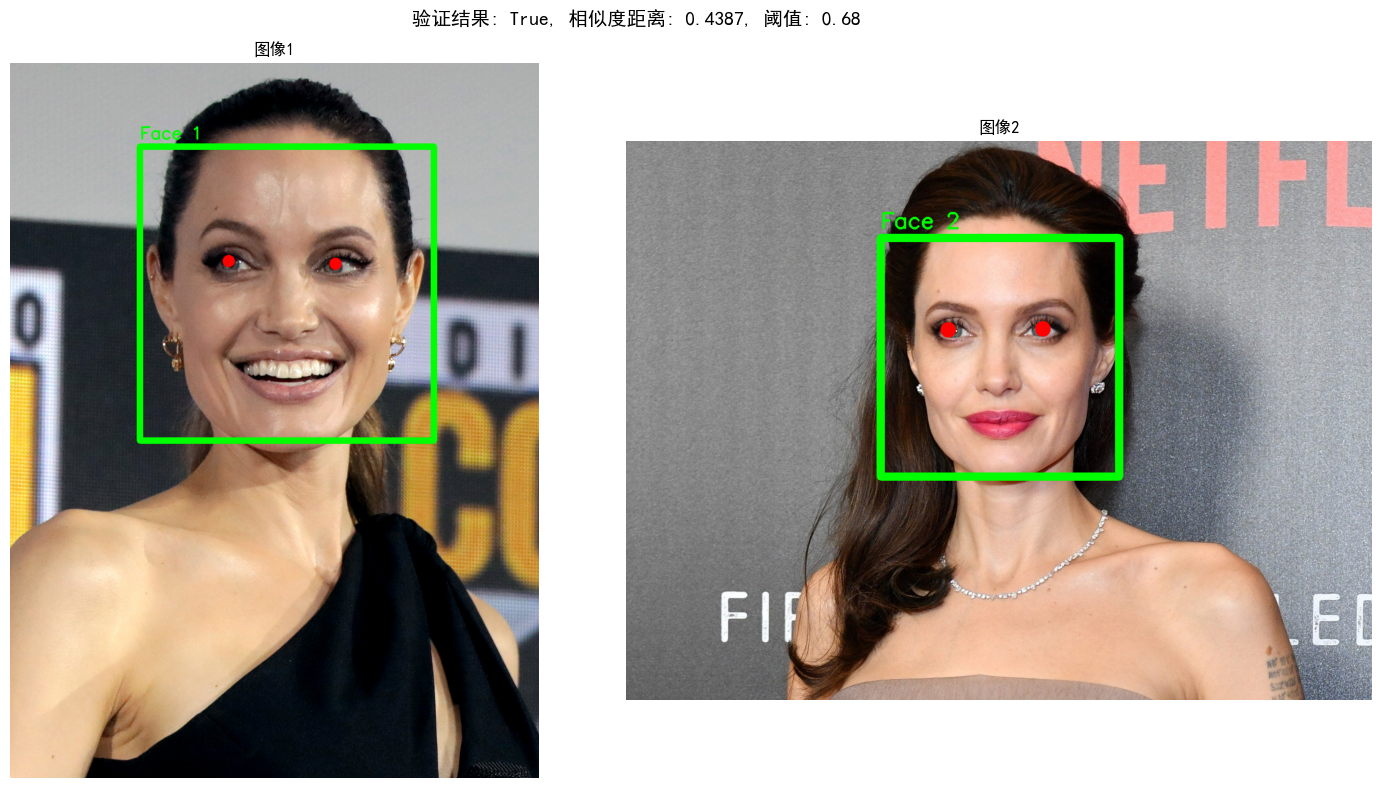

图像已保存至: facial_recognition_results.png
{
    "verified": true,
    "distance": 0.438655,
    "threshold": 0.68,
    "model": "VGG-Face",
    "detector_backend": "opencv",
    "similarity_metric": "cosine"
}


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import json
from itertools import islice

# 设置 matplotlib 支持中文显示
plt.rcParams["font.family"] = ["SimHei"]

img1_path = r"E:\VS Code\deepface\tests\dataset\img1.jpg"
img2_path = r"E:\VS Code\deepface\tests\dataset\img2.jpg"

# 使用 DeepFace 进行人脸验证
result = DeepFace.verify(img1_path, img2_path)

first_six = dict(islice(result.items(), 6))

# 读取图像
img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

# 将BGR颜色空间转换为RGB（matplotlib使用RGB）
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# 定义绘制函数
def draw_facial_areas(img, facial_data, img_name):
    """在图像上绘制面部框和眼睛点"""
    x, y, w, h = facial_data["x"], facial_data["y"], facial_data["w"], facial_data["h"]
    left_eye, right_eye = facial_data["left_eye"], facial_data["right_eye"]
    
    # 1. 绘制面部边界框
    img = cv2.rectangle(
        img, (x, y), (x + w, y + h), 
        color=(0, 255, 0), thickness=16  # 绿色矩形框
    )
    
    # 2. 绘制眼睛点
    img = cv2.circle(img, tuple(left_eye), radius=16, color=(255, 0, 0), thickness=-1)  # 蓝色圆点
    img = cv2.circle(img, tuple(right_eye), radius=16, color=(255, 0, 0), thickness=-1)
    
    # 3. 添加文本标注
    img = cv2.putText(
        img, f"Face {img_name}", (x, y - 20), 
        cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 4
    )
    return img

# 绘制img1和img2的面部区域
img1_result = draw_facial_areas(img1.copy(), result["facial_areas"]["img1"], "1")
img2_result = draw_facial_areas(img2.copy(), result["facial_areas"]["img2"], "2")

# 创建对比显示
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# 在第一个子图显示img1
axes[0].imshow(img1_result)
axes[0].set_title("图像1")
axes[0].axis('off')

# 在第二个子图显示img2
axes[1].imshow(img2_result)
axes[1].set_title("图像2")
axes[1].axis('off')

# 添加整体识别结果标题
fig.suptitle(
    f"验证结果: {result['verified']}, 相似度距离: {result['distance']:.4f}, 阈值: {result['threshold']}",
    fontsize=14
)

plt.tight_layout()

# 保存图像（指定DPI以获得更高质量的输出）
output_path = "facial_recognition_results.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# 在notebook中显示图像
plt.show()

print(f"图像已保存至: {output_path}")

# plt.tight_layout()
plt.show()

print(json.dumps(first_six, indent=4, ensure_ascii=False))  # 打印结果为JSON格式

# Face recognition

人脸识别：在指定数据库中查找输入图像的身份。

图片已保存至: face_recognition_result.png


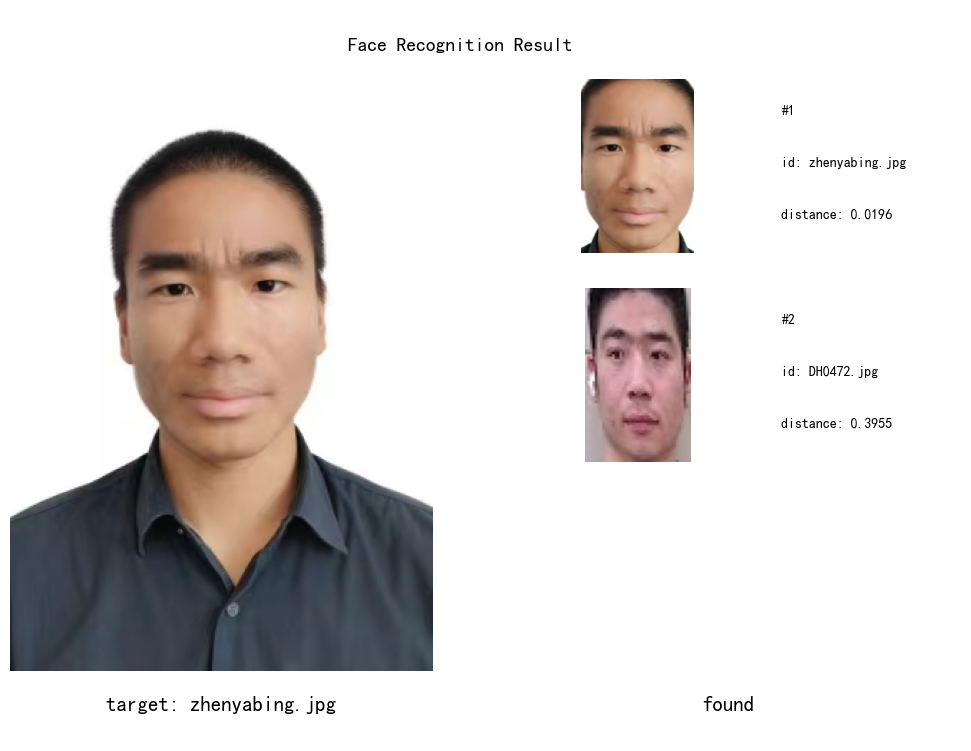

In [15]:
import matplotlib.pyplot as plt
import cv2
import os
from deepface import DeepFace
import numpy as np

# 定义目标图像路径和数据库路径
# target_img_path = "wangchunfa2.jpg"
target_img_path = "zhenyabing.jpg"
db_path = "database"

backends = [
    'opencv', 'ssd', 'dlib', 'mtcnn', 'fastmtcnn',
    'retinaface', 'mediapipe', 'yolov8', 'yolov11s',
    'yolov11n', 'yolov11m', 'yunet', 'centerface',
]

models = [
    "VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace",
    "DeepID", "ArcFace", "Dlib", "SFace", "GhostFaceNet",
    "Buffalo_L",
]

# 使用DeepFace.find函数查找最相似的3个人脸
dfs = DeepFace.find(img_path=target_img_path, db_path=db_path, model_name=models[1], detector_backend=backends[5], enforce_detection=False, silent=True)

# 提取最相似的3个人脸信息
top_3_similar = dfs[0].head(3)
top_3_similar_images = top_3_similar['identity'].tolist()
top_3_similar_distances = top_3_similar['distance'].tolist()

# 读取目标图像
target_img = cv2.imread(target_img_path)
target_img = cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB)
target_img_name = os.path.basename(target_img_path)

# 创建布局
fig = plt.figure(figsize=(12, 9.5))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 1])

# 添加整张大图英文标题
fig.suptitle("Face Recognition Result", fontsize=14, y=0.85)

# 左侧：显示目标图像
ax_left = fig.add_subplot(gs[0, 0])
ax_left.imshow(target_img)
ax_left.axis('off')
left_pos = ax_left.get_position()

# 左侧底部文字（字体大小增加到15）
ax_left_text = fig.add_axes([left_pos.x0, left_pos.y0 - 0.06, left_pos.width, 0.05])  # 适当增加文字区域高度
ax_left_text.axis('off')
ax_left_text.text(0.5, 0.5, "target: " + target_img_name, fontsize=15, ha='center', va='center')

# 右侧：显示3张相似人脸
ax_right = fig.add_subplot(gs[0, 1])
ax_right.axis('off')
right_pos = ax_right.get_position()

# 右侧布局参数
total_height = left_pos.height
spacing = total_height * 0.06
usable_height = total_height - spacing * 2
subplot_height = usable_height / 3
start_y = left_pos.y0 + left_pos.height - subplot_height

for i, (img_path, distance) in enumerate(zip(top_3_similar_images, top_3_similar_distances)):
    try:
        # 提取人脸并处理
        face_objs = DeepFace.extract_faces(img_path=img_path, detector_backend="mtcnn", enforce_detection=False)
        if face_objs:
            similar_face = face_objs[0]['face']
            if similar_face.dtype == 'float64':
                similar_face = (similar_face * 255).astype('uint8')
            # 确保3通道
            if len(similar_face.shape) == 2:
                similar_face = cv2.cvtColor(similar_face, cv2.COLOR_GRAY2RGB)
            elif similar_face.shape[2] == 4:
                similar_face = cv2.cvtColor(similar_face, cv2.COLOR_BGRA2RGB)
            elif similar_face.shape[2] == 1:
                similar_face = cv2.cvtColor(similar_face, cv2.COLOR_GRAY2RGB)
        else:
            similar_face = cv2.imread(img_path)
            similar_face = cv2.cvtColor(similar_face, cv2.COLOR_BGR2RGB)

        similar_img_name = os.path.basename(img_path)

        # 计算位置并显示
        y_pos = start_y - i * (subplot_height + spacing)
        ax_img = fig.add_axes([right_pos.x0, y_pos, 0.2, subplot_height])
        ax_img.imshow(similar_face)
        ax_img.axis('off')

        # 右侧文字信息
        ax_text = fig.add_axes([right_pos.x0 + 0.22, y_pos, 0.15, subplot_height])
        ax_text.axis('off')
        ax_text.text(0, 0.8, f"#{i + 1}", fontsize=10)
        ax_text.text(0, 0.5, f"id: {similar_img_name}", fontsize=10)
        ax_text.text(0, 0.2, f"distance: {distance:.4f}", fontsize=10)
    except Exception as e:
        print(f"Error processing image {img_path}: {e}")

# 右侧底部文字（字体大小增加到15）
ax_right_text = fig.add_axes([right_pos.x0, left_pos.y0 - 0.06, right_pos.width, 0.05])  # 适当增加文字区域高度
ax_right_text.axis('off')
ax_right_text.text(0.5, 0.5, "found", fontsize=15, ha='center', va='center')

# 保存图片
output_path = "face_recognition_result.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight', pad_inches=0.05)
print(f"图片已保存至: {output_path}")

# 显示图片
plt.show()

# Facial Attribute Analysis

人脸属性分析：分析人脸的年龄、性别、表情和种族等属性。

Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  8.95it/s]


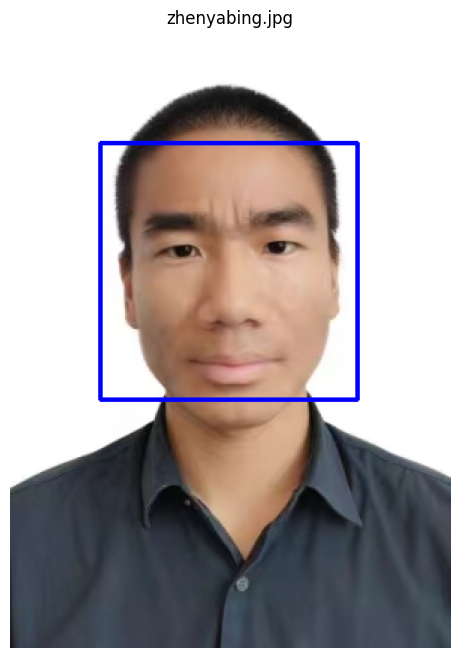

----------------------
年龄: 23
主导性别: Man
主导种族: asian
主导情绪: neutral
----------------------


In [ ]:
import pandas as pd

image_path = "zhenyabing.jpg"
# image_path="wangchunfa2.jpg"


objs = DeepFace.analyze(
  image_path, actions = ['age', 'gender', 'race', 'emotion']
)

img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

region = objs[0]['region']
x, y, w, h = region['x'], region['y'], region['w'], region['h']

# 在图像上绘制人脸区域的边界框
cv2.rectangle(img_rgb, (x,y), (x+w,y+h),(0,0,255),2)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.axis('off')  # 不显示坐标轴
plt.title(os.path.basename(image_path))
plt.show()


# 处理分析结果
for obj in objs:
    age = obj["age"]
    dominant_gender = obj["dominant_gender"]
    dominant_race = obj["dominant_race"]
    dominant_emotion = obj["dominant_emotion"]

    print("----------------------")
    print(f"年龄: {age}")
    print(f"主导性别: {dominant_gender}")
    print(f"主导种族: {dominant_race}")
    print(f"主导情绪: {dominant_emotion}")
    print("----------------------")

In [13]:
print(objs)

[{'age': 23, 'region': {'x': 60, 'y': 74, 'w': 172, 'h': 172, 'left_eye': (178, 141), 'right_eye': (113, 145)}, 'face_confidence': 0.93, 'gender': {'Woman': np.float32(0.0005235297), 'Man': np.float32(99.99947)}, 'dominant_gender': 'Man', 'race': {'asian': np.float32(99.99701), 'indian': np.float32(4.5889316e-05), 'black': np.float32(6.106441e-09), 'white': np.float32(1.6096934e-05), 'middle eastern': np.float32(2.2084576e-09), 'latino hispanic': np.float32(0.0029287406)}, 'dominant_race': 'asian', 'emotion': {'angry': np.float32(7.393158), 'disgust': np.float32(0.0014971207), 'fear': np.float32(10.994936), 'happy': np.float32(0.21563658), 'sad': np.float32(7.671312), 'surprise': np.float32(0.017209083), 'neutral': np.float32(73.70626)}, 'dominant_emotion': 'neutral'}]


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  9.47it/s]


结果已保存至：result.jpg


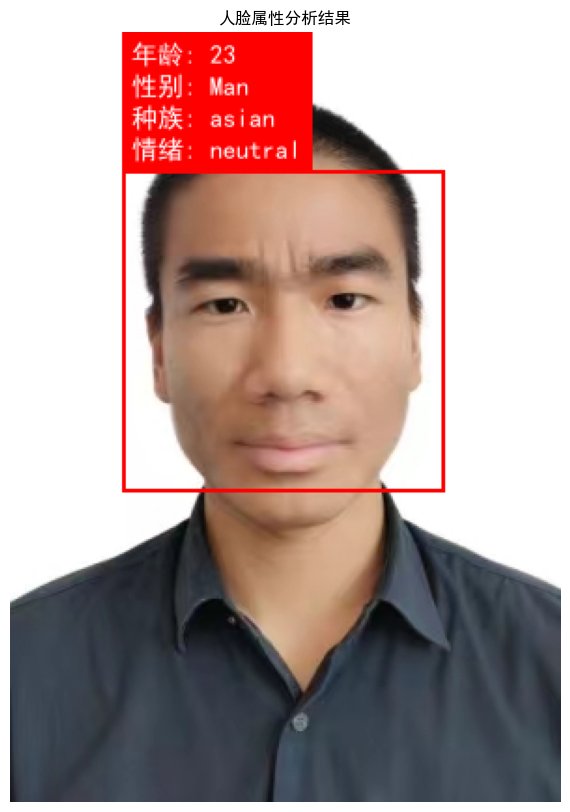

In [27]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace
from PIL import Image, ImageDraw, ImageFont
import numpy as np

# 设置matplotlib中文字体
plt.rcParams["font.family"] = ["SimHei", "Microsoft YaHei"]

def analyze_and_visualize_face(image_path, output_path=None, show=True):
    """分析人脸属性并在原图上绘制边界框和属性信息"""
    # 1. 读取图像
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"无法读取图像，请检查路径：{image_path}")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # 2. 人脸属性分析
    results = DeepFace.analyze(
        img_path=image_path,
        actions=('age', 'gender', 'race', 'emotion'),
        enforce_detection=False,
        detector_backend='opencv'
    )
    
    # 3. 单独提取人脸边界框
    face_objs = DeepFace.extract_faces(
        img_path=image_path,
        detector_backend='opencv',
        enforce_detection=False
    )
    
    # 4. 确保结果数量匹配
    min_len = min(len(results), len(face_objs))
    results = results[:min_len]
    face_objs = face_objs[:min_len]
    
    # 5. 转换为PIL图像
    pil_img = Image.fromarray(img_rgb)
    draw = ImageDraw.Draw(pil_img)
    
    # 6. 创建字体对象（使用默认字体，确保中文显示正常）
    try:
        # 尝试加载支持中文的系统字体（Linux/macOS）
        font = ImageFont.truetype("simhei.ttf", 14)
    except (IOError, OSError):
        try:
            # 尝试Windows系统字体
            font = ImageFont.truetype("C:/Windows/Fonts/simhei.ttf", 14)
        except (IOError, OSError):
            # 使用默认字体（可能无法完美显示中文，但能避免崩溃）
            font = ImageFont.load_default()
    
    # 7. 遍历人脸并绘制
    for result, face_obj in zip(results, face_objs):
        # 获取边界框
        region = face_obj['facial_area']
        x, y, w, h = region['x'], region['y'], region['w'], region['h']
        
        # 构建显示文本
        text = (f"年龄: {int(result['age'])}\n"
                f"性别: {result['dominant_gender']}\n"
                f"种族: {result['dominant_race']}\n"
                f"情绪: {result['dominant_emotion']}")
        
        # 计算文本尺寸（使用字体对象）
        text_bbox = draw.multiline_textbbox((0, 0), text, font=font)
        text_width = text_bbox[2] - text_bbox[0]  # 文本宽度
        text_height = text_bbox[3] - text_bbox[1]  # 文本高度
        
        # 绘制边界框
        draw.rectangle([x, y, x+w, y+h], outline="red", width=2)
        
        # 绘制文本背景
        draw.rectangle(
            [x, y-text_height-10, x+text_width+10, y],
            fill="red"
        )
        
        # 绘制文本（使用字体对象）
        draw.multiline_text(
            (x+5, y-text_height-5),
            text,
            fill="white",
            font=font
        )
    
    # 8. 保存结果
    if output_path:
        img_bgr = cv2.cvtColor(np.array(pil_img), cv2.COLOR_RGB2BGR)
        cv2.imwrite(output_path, img_bgr)
        print(f"结果已保存至：{output_path}")
    
    # 9. 显示图像
    if show:
        plt.figure(figsize=(10, 10))
        plt.imshow(pil_img)
        plt.axis("off")
        plt.title("人脸属性分析结果")
        plt.show()
    
    return pil_img

# 使用示例
image_path = "zhenyabing.jpg"  # 替换为你的图像路径
output_path = "result.jpg"  # 保存结果的路径
result_img = analyze_and_visualize_face(image_path, output_path)

Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  9.09it/s]


Result saved to: Facial_Attribute_Analysis_Result.jpg


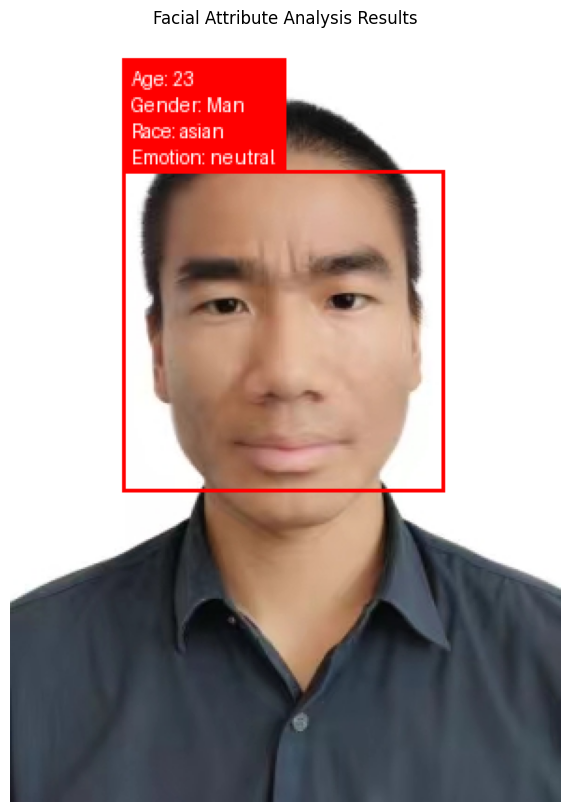

In [32]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace
from PIL import Image, ImageDraw, ImageFont
import numpy as np

# 设置matplotlib字体
plt.rcParams["font.family"] = ["DejaVu Sans", "Arial", "sans-serif"]

def analyze_and_visualize_face(image_path, output_path=None, show=True):
    """Analyze facial attributes and visualize results on the original image"""
    # 读取图像
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Failed to read image: {image_path}")
    
    # 转换为RGB格式
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # 人脸属性分析（包含边界框信息）
    results = DeepFace.analyze(
        img_path=image_path,
        actions=('age', 'gender', 'race', 'emotion'),
        enforce_detection=False,
        detector_backend='opencv'
    )
    
    # 转换为PIL图像用于绘制
    pil_img = Image.fromarray(img_rgb)
    draw = ImageDraw.Draw(pil_img)
    
    # 尝试加载字体，确保兼容性
    try:
        font = ImageFont.load_default()
    except Exception:
        font = None
    
    # 遍历每个人脸结果
    for result in results:
        # 直接从分析结果中获取边界框坐标
        region = result['region']
        x, y, w, h = region['x'], region['y'], region['w'], region['h']
        
        # 构建显示文本
        text = (f"Age: {int(result['age'])}\n"
                f"Gender: {result['dominant_gender']}\n"
                f"Race: {result['dominant_race']}\n"
                f"Emotion: {result['dominant_emotion']}")
        
        # 计算文本尺寸
        try:
            if font:
                text_bbox = draw.multiline_textbbox((0, 0), text, font=font)
                text_width = text_bbox[2] - text_bbox[0]
                text_height = text_bbox[3] - text_bbox[1]
            else:
                text_width = len(max(text.split('\n'), key=len)) * 8
                text_height = text.count('\n') * 20 + 20
        except Exception:
            text_width, text_height = 100, 80
        
        # 绘制边界框和文本
        draw.rectangle([x, y, x+w, y+h], outline="red", width=2)
        draw.rectangle([x, y-text_height-10, x+text_width+10, y], fill="red")
        draw.multiline_text((x+5, y-text_height-5), text, fill="white", font=font)
    
    # 保存结果
    if output_path:
        img_bgr = cv2.cvtColor(np.array(pil_img), cv2.COLOR_RGB2BGR)
        cv2.imwrite(output_path, img_bgr)
        print(f"Result saved to: {output_path}")
    
    # 显示结果
    if show:
        plt.figure(figsize=(10, 10))
        plt.imshow(pil_img)
        plt.axis("off")
        plt.title("Facial Attribute Analysis Results")
        plt.show()
    
    return pil_img

# 使用示例
image_path = "zhenyabing.jpg"  # 替换为你的图像路径
output_path = "Facial_Attribute_Analysis_Result.jpg"  # 保存结果的路径
result_img = analyze_and_visualize_face(image_path, output_path)

# Real Time Analysis

In [46]:
backends = [
    'opencv', 'ssd', 'dlib', 'mtcnn', 'fastmtcnn',
    'retinaface', 'mediapipe', 'yolov8', 'yolov11s',
    'yolov11n', 'yolov11m', 'yunet', 'centerface',
]

models = [
    "VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace",
    "DeepID", "ArcFace", "Dlib", "SFace", "GhostFaceNet",
    "Buffalo_L",
]

In [47]:
!pwd

/e/VS Code/deepface


In [51]:
DeepFace.stream(
	db_path = r"database",
	model_name = models[0],
	detector_backend = backends[0],
	enable_face_analysis = False,
	time_threshold = 0,
	frame_threshold = 0,
	output_path = r"E:\VS Code\deepface\output"
)

25-07-13 15:10:11 - VGG-Face is built
25-07-13 15:10:13 - Hello, database\DH0466\DH0466.jpg
25-07-13 15:10:13 - freezed
25-07-13 15:10:14 - Freeze released
25-07-13 15:10:15 - Hello, database\zhenyabing\zhenyabing.jpg
25-07-13 15:10:15 - freezed
25-07-13 15:10:16 - Freeze released
25-07-13 15:10:16 - Hello, database\zhenyabing\zhenyabing.jpg
25-07-13 15:10:16 - freezed
25-07-13 15:10:17 - Freeze released
25-07-13 15:10:17 - Hello, database\zhenyabing\zhenyabing.jpg
25-07-13 15:10:17 - freezed
25-07-13 15:10:18 - Freeze released
25-07-13 15:10:19 - Hello, database\zhenyabing\zhenyabing.jpg
25-07-13 15:10:19 - freezed
25-07-13 15:10:20 - Freeze released
25-07-13 15:10:20 - Hello, database\DH0334\DH0334.jpg
25-07-13 15:10:20 - freezed
25-07-13 15:10:21 - Freeze released


# Face recognition models

In [ ]:
models = [
    "VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace",
    "DeepID", "ArcFace", "Dlib", "SFace", "GhostFaceNet",
    "Buffalo_L",
]

result = DeepFace.verify(
  img1_path = "img1.jpg", img2_path = "img2.jpg", model_name = models[0]
)

dfs = DeepFace.find(
  img_path = "img1.jpg", db_path = "C:/my_db", model_name = models[1]
)

embeddings = DeepFace.represent(
  img_path = "img.jpg", model_name = models[2]
)

# Face Detection and Alignment

In [ ]:
backends = [
    'opencv', 'ssd', 'dlib', 'mtcnn', 'fastmtcnn',
    'retinaface', 'mediapipe', 'yolov8', 'yolov11s',
    'yolov11n', 'yolov11m', 'yunet', 'centerface',
]
detector = backends[3]
align = True

obj = DeepFace.verify(
  img1_path = "img1.jpg", img2_path = "img2.jpg", detector_backend = detector, align = align
)

dfs = DeepFace.find(
  img_path = "img.jpg", db_path = "my_db", detector_backend = detector, align = align
)

embedding_objs = DeepFace.represent(
  img_path = "img.jpg", detector_backend = detector, align = align
)

demographies = DeepFace.analyze(
  img_path = "img4.jpg", detector_backend = detector, align = align
)

face_objs = DeepFace.extract_faces(
  img_path = "img.jpg", detector_backend = detector, align = align
)

# Face Anti Spoofing 人脸防伪

In [ ]:
# anti spoofing test in face detection
face_objs = DeepFace.extract_faces(img_path="dataset/img1.jpg", anti_spoofing = True)
assert all(face_obj["is_real"] is True for face_obj in face_objs)

# anti spoofing test in real time analysis
DeepFace.stream(db_path = "C:/database", anti_spoofing = True)